# TP5 - Inferencia Bayesiana

TO DO:

3. Prediccion
Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

5. Prior 
Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros de su prior Beta.

PROBLEMAS:
    - Por alguna razón no me deja usar pm.beta(100,100)
    - No entiendo bien que piden en el punto 3, ¿predicción en que sentido?



In [17]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pymc3 import traceplot

In [75]:
def correr_modelo(tiradas, caras, iteraciones, alpha, beta):
    modelo = pm.Model()
    with modelo:
        theta = pm.Beta('theta', alpha=1, beta=1) #prior de beta(1,1)
        caras = pm.Binomial('caras', n=tiradas, p=theta, observed=caras)
        trace = pm.sample(iteraciones)
    return trace, modelo

# 1. Implementacion

Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors resultantes de observar 6 caras de 6 tiradas.

In [76]:
trace, _ = correr_modelo(tiradas=6, caras=6, iteraciones=1000, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:01<00:00, 812.79it/s]


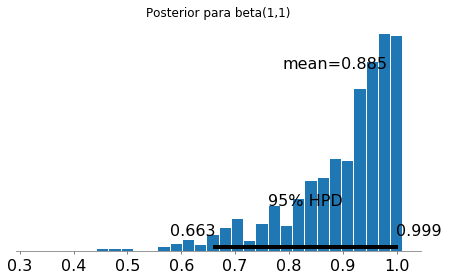

In [77]:
pm.plot_posterior(trace)
plt.title("Posterior para beta(1,1)")
plt.show()

In [78]:
trace, _ = correr_modelo(tiradas=6, caras=6, iteraciones=2000, alpha=50, beta=50)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:03<00:00, 803.66it/s]


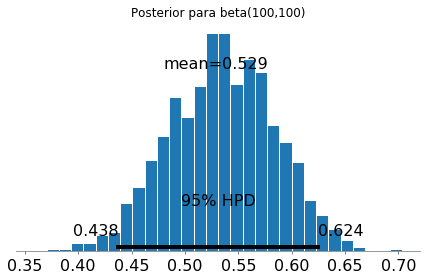

In [79]:
pm.plot_posterior(trace2)
plt.title("Posterior para beta(100,100)")
plt.show()

# 2. Resúmenes

Calcule el MAP (maximo a posteriori) y las medias de ambas posteriors.

In [66]:
MAP = pm.find_MAP(model=modelo)
MAP

logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 527.45it/s]


{'theta': array(0.5288461537406147),
 'theta_logodds__': array(0.1155128866982778)}

In [68]:
MAP = pm.find_MAP(model=modelo2)
MAP

logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 332.59it/s]


{'theta': array(0.5288461537406147),
 'theta_logodds__': array(0.1155128866982778)}

# 4. Otros datos

Repita los puntos anteriores para una situacion en la que se observan 20 caras de 20 tiradas, y otra en la que se observan 3 caras de 3 tiradas. ¿Que puede concluir de los priors elegidos? ¿Y del modelo en general?

In [83]:
trace, _ = correr_modelo(tiradas=20, caras=20, iteraciones=3500, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 98%|█████████▊| 3939/4000 [00:04<00:00, 823.17it/s]/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 5 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 4000/4000 [00:04<00:00, 823.10it/s]


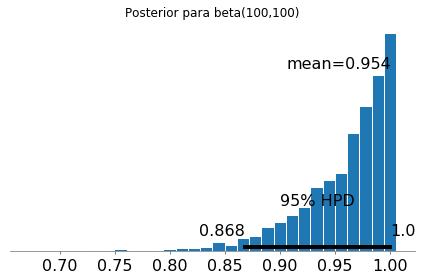

In [84]:
pm.plot_posterior(trace)
plt.title("Posterior para beta(1,1)")
plt.show()

In [86]:
trace, _ = correr_modelo(tiradas=20, caras=20, iteraciones=3500, alpha=50, beta=50)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 3996/4000 [00:04<00:00, 834.26it/s]/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 4 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 4000/4000 [00:04<00:00, 833.21it/s]


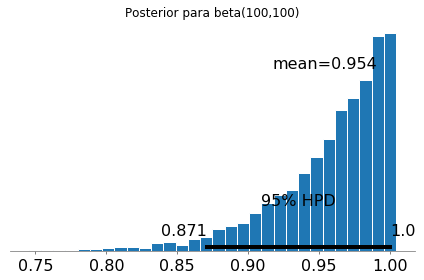

In [87]:
pm.plot_posterior(trace)
plt.title("Posterior para beta(100,100)")
plt.show()

El posterior resulta sesgado hacia la derecha cuando se tira 20 veces y se obtienen 20 caras, con ambos priors. Esto nos indica que cuando la cantidad de datos aumenta, el prior influye menos en el resultado.

In [88]:
trace, _ = correr_modelo(tiradas=3, caras=3, iteraciones=3500, alpha=1, beta=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 4000/4000 [00:04<00:00, 874.39it/s]


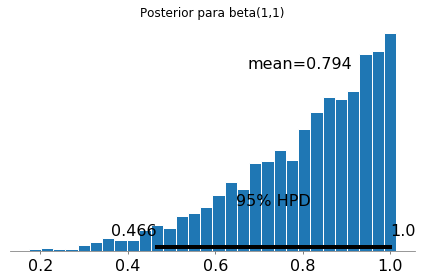

In [89]:
pm.plot_posterior(trace)
plt.title("Posterior para beta(1,1)")
plt.show()

In [90]:
trace, _ = correr_modelo(tiradas=3, caras=3, iteraciones=3500, alpha=50, beta=50)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 98%|█████████▊| 3930/4000 [00:04<00:00, 834.92it/s]/usr/local/lib/python3.5/dist-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.891376862582, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 4000/4000 [00:04<00:00, 834.22it/s]


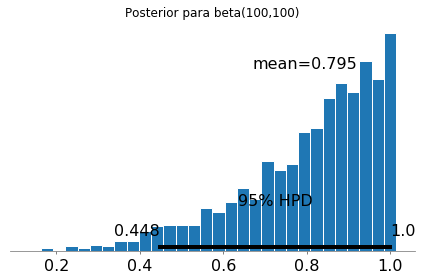

In [92]:
pm.plot_posterior(trace)
plt.title("Posterior para beta(100,100)")
plt.show()